In [12]:
%load_ext autoreload
%autoreload 2

import gpjax as gpx
import pickle
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
from gpjax.kernels import RBF, Linear, Periodic, PoweredExponential

from kernels import OrnsteinUhlenbeck
from kernelsearch import KernelSearch, describe_kernel
from util import calculate_example_lightcurve

rng_key = jax.random.PRNGKey(42)

plt.style.use(
    "https://raw.githubusercontent.com/JaxGaussianProcesses/GPJax/main/docs/examples/gpjax.mplstyle"
)
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# CREATE ARTIFICAL DATA

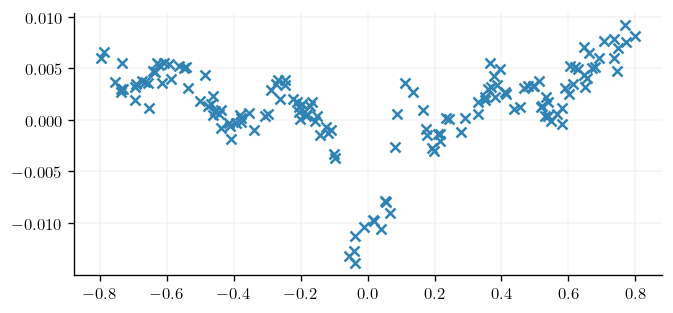

In [16]:
noise_std = 0.001
(
    t_train,
    lc_train,
    train_mask,
    t,
    lightcurve,
    systematics,
    noise,
    mask,
) = calculate_example_lightcurve(noise_std=0.001)

# mean = jnp.mean(lc_train[train_mask])
# lc_train -= mean

plt.scatter(t_train, lc_train)
plt.savefig("figures/data.pdf")

## PERFORM KERNEL SEARCH

In [7]:
kernel_library = [
    Linear(),
    RBF(),
    OrnsteinUhlenbeck(),
    Periodic(),
    # PoweredExponential(power=jnp.array(0.8)),
]  # default powered exponential has infinite parameter for some reason

In [8]:
tree = KernelSearch(
    kernel_library,
    X=jnp.array(t_train[train_mask]),
    y=jnp.array(lc_train[train_mask]),
    obs_stddev=noise_std,
    verbosity=1,
)

model = tree.search(
    depth=7,
    n_leafs=4,
    patience=1,
)

Fitting Layer 1: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


Layer 1 || Current AICs: [-1394.95945798723, -1386.6622842026613, -1306.2319749198916, -717.0410238244532]


Fitting Layer 2: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]


Layer 2 || Current AICs: [-1405.256392397795, -1398.4281892951633, -1398.4281892951626, -1393.1879449876258, -1392.9594579872157, -1392.9594579402983, -1392.9594478320084, -1392.9593512567387, -1392.106571269022, -1391.003327719544, -1390.9594570248294, -1390.5403912702227, -1385.666271021608, -1384.6622842026636, -1384.662284202662, -1384.6622842001443, -1384.654009022014, -1384.6540090219862, -1383.0642440024596, -1383.0642439275748, -1382.8614165524168, -1374.4624277273626, -1374.4624277273197, -1316.1785225627675, -1315.0443118118544, -1315.0443118118346, -1304.2319749199035, -1304.2319749177768, -1304.2319719085021, -1302.3551487975747, -1278.3039590556918, -715.0410238242862]


Fitting Layer 3: 100%|██████████| 44/44 [03:07<00:00,  4.26s/it]


Layer 3 || Current AICs: [-1410.9831059099176, -1410.9831058261907, -1404.3335346059011, -1404.3335346059005, -1404.1834007179184, -1403.2563923968441, -1403.2563923755233, -1403.2563922315233, -1402.1834007179973, -1402.1834003769482, -1401.2563923977943, -1401.256392397787, -1401.2563923970179, -1400.4254253624333, -1396.4281892951626, -1396.4281892951524, -1396.4281892951503, -1396.4281892951433, -1396.4281892951244, -1396.4281892951026, -1396.4281892950996, -1396.4281892950771, -1396.428189295077, -1396.4281892950544, -1394.4281892992126, -1394.4281892992124, -1394.4281892951624, -1394.4281892951624, -1394.4281892951524, -1394.4281892951522, -1394.42818929515, -1394.4281892951474, -1394.412490210757, -1393.5083913530739, -1392.8105122130107, -1392.8105122130107, -1391.1879449876258, -1391.187944987621, -1391.187944983783, -1389.8533936761755, -1384.762458527202, -1366.5918514059829, -1366.5918514059797, inf]


Fitting Layer 4: 100%|██████████| 48/48 [02:59<00:00,  3.74s/it]


Layer 4 || Current AICs: [-1419.785369614969, -1419.7853696144941, -1412.433808909385, -1412.4338089093837, -1408.9831059949763, -1408.98310598102, -1408.9831059099151, -1408.9831059098767, -1408.983105909431, -1408.9831059081318, -1408.9831058264433, -1408.983105826434, -1408.983105825488, -1408.983105822739, -1406.9831059099583, -1406.9831059099515, -1406.9831059099438, -1406.9831059099386, -1406.983105826468, -1406.9831058264535, -1406.983105826437, -1406.98310582635, -1404.9831059098772, -1404.9831058264574, -1402.3335346058996, -1402.3335346058996, -1402.3335346058404, -1402.333534605818, -1402.333534594057, -1402.3335345931982, -1402.3335345931976, -1402.3335345902442, -1402.3335345393493, -1402.3335335288084, -1400.333534605901, -1400.3335346059005, -1400.3335346058661, -1400.3335346058295, -1400.3335346058082, -1400.3335346058043, -1400.333534605346, -1400.333534605346, -1398.3335346058545, -1398.3335346058543, -1384.9866622066122, -1384.986662206611, -1382.9866621555489, -1382

Fitting Layer 5: 100%|██████████| 48/48 [04:26<00:00,  5.55s/it]


Layer 5 || Current AICs: [-1417.7853696149245, -1417.7853696148838, -1417.7853696148513, -1417.7853696148397, -1417.7853696147058, -1417.785369614642, -1417.78536961448, -1417.7853696143682, -1417.7853696143654, -1417.7853696143015, -1415.7853696149684, -1415.7853696149455, -1415.785369614945, -1415.7853696149014, -1415.7853696144934, -1415.7853696144932, -1415.7853696144869, -1415.7853696143204, -1413.7853696148636, -1413.785369614491, -1410.4338148658867, -1410.4338148658867, -1410.433808909362, -1410.4338089093499, -1410.433808909348, -1410.4338089093458, -1410.4338089093442, -1410.4338089093424, -1410.43380890933, -1410.433808909125, -1408.433808909384, -1408.433808909379, -1408.4338089093785, -1408.433808909376, -1408.433808909376, -1408.4338089093426, -1408.4338085403797, -1408.4338085403785, -1406.5717356079545, -1406.5717356079542, -1390.9594579844297, -1390.9594579844297, -1385.3312358723804, -1385.3312358723354, -1384.632688097128, -1384.6326878023278, -1369.3413480395168, -1

Fitting Layer 6: 100%|██████████| 48/48 [05:17<00:00,  6.62s/it]

Layer 6 || Current AICs: [-1417.7853696149652, -1415.785369614908, -1415.7853696148823, -1415.7853696148732, -1415.785369614862, -1415.7853696148268, -1415.7853696148102, -1415.7853696147833, -1415.785369614771, -1415.7853696147683, -1415.785369614768, -1415.7853696147652, -1415.7853696147527, -1415.78536961474, -1415.7853696146888, -1415.7853696146879, -1415.785369614679, -1415.7853696146717, -1415.7853696146587, -1415.785369614594, -1415.7853696145826, -1413.7853696149339, -1413.7853696149289, -1413.7853696149218, -1413.7853696148784, -1413.785369614875, -1413.7853696148745, -1413.7853696148672, -1413.7853696148507, -1413.7853696148404, -1413.785369614798, -1413.7853696147947, -1413.785369614794, -1413.785369614789, -1413.7853696147804, -1413.7853696147536, -1413.7853696146926, -1411.785369614859, -1411.7853696148234, -1411.785369614753, -1411.7853696034988, -1382.6326880896593, -1382.6326880878785, -1382.6326847927544, -1367.3413480395916, -1367.3413480395188, -1367.3413480394734, -

In [9]:
assert isinstance(model, gpx.gps.AbstractPosterior)

model_name = "gpmodel"
with open(f"saved/{model_name}", "wb") as file:
    pickle.dump(model_name, file)
describe_kernel(model)

'(Periodic * Linear * Linear) + Periodic'

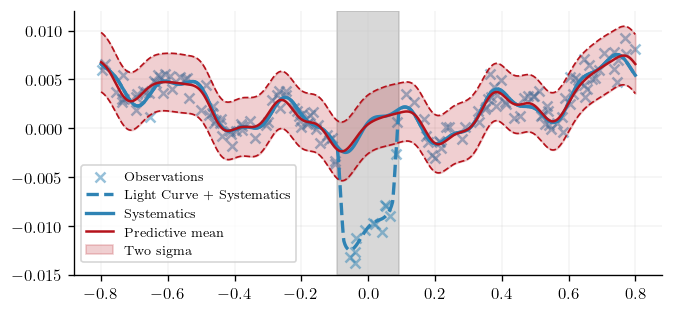

In [41]:
assert isinstance(model, gpx.gps.AbstractPosterior)

latent_dist = model(t.reshape(-1, 1), train_data=tree.data)
predictive_dist = model.likelihood(latent_dist)

predictive_mean = predictive_dist.mean()
predictive_std = predictive_dist.stddev()

fig, ax = plt.subplots()
ax.scatter(t_train, lc_train, label="Observations", color=cols[0], alpha=0.5)
ax.plot(
    t,
    lightcurve + systematics,
    label="Light Curve + Systematics",
    color=cols[0],
    linestyle="--",
    linewidth=2,
)
ax.plot(
    t,
    systematics,
    label="Systematics",
    color=cols[0],
    linestyle="-",
    linewidth=2,
)

ax.plot(
    t,
    predictive_mean,
    label="Predictive mean",
    color=cols[1],
)
ax.fill_between(
    t,
    predictive_mean - 2 * predictive_std,
    predictive_mean + 2 * predictive_std,
    alpha=0.2,
    label="Two sigma",
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean - 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean + 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)

ax.fill_between(
    t,
    -0.015,
    0.012,
    where=~mask,
    alpha=0.3,
    color="grey",
    zorder=0,
)
ax.set_ylim([-0.015, 0.012])


ax.legend(loc="center left", bbox_to_anchor=(0, 0.23))
plt.savefig("figures/gp_fit.pdf")